# Histogramas sin libreria

In [1]:
x = (0,1,1,2,3,7,7,7,25)

In [9]:
def count_elements(seq) -> dict:
    """"
    Función que cuenta las frecuencias de aparición 
    de cada elemento de la secuencia, creando un diccionario 
    como si fueses una tabla de frecuencias
    """
    hist= {}
    for i in seq:
        hist[i] = hist.get(i,0) + 1
    return hist

In [10]:
Fabs = count_elements(x)

In [11]:
Fabs

{0: 1, 1: 2, 2: 1, 3: 1, 7: 3, 25: 1}

In [14]:
from collections import Counter

In [15]:
Fabs2 = Counter(x)

In [16]:
Fabs2

Counter({0: 1, 1: 2, 2: 1, 3: 1, 7: 3, 25: 1})

In [17]:
def ascii_histogram(seq) -> None:
    """" 
    Un histograma de frecuencias absolutas
    colocado en horizontal y con caracteres ASCII
    """
    fAbs = count_elements(seq)
    for k in sorted(Fabs):
        print('{0:5d} {1}'.format(k, '+'*Fabs[k]))

In [19]:
ascii_histogram(x)

    0 +
    1 ++
    2 +
    3 +
    7 +++
   25 +


# Histogramas con NumPy

In [7]:
import numpy as np

In [35]:
np.random.seed(2019)

In [37]:
np.set_printoptions(precision=3)# Imprime número con hasta 3 decimales

In [38]:
x = np.random.laplace(loc=10, scale=3, size=1000) #loc es la media

In [39]:
x[:10]

array([14.935,  9.278, 10.855, 10.968, 14.294,  8.459, 11.555, 14.926,
       14.316,  9.373])

In [40]:
hist, bin_edges = np.histogram(x)

In [41]:
hist

array([  1,   0,   0,   8,  48, 194, 542, 167,  31,   9])

In [42]:
bin_edges

array([-19.167, -14.642, -10.118,  -5.593,  -1.069,   3.455,   7.98 ,
        12.504,  17.029,  21.553,  26.077])

In [43]:
bcount = np.bincount(x)
bcount

TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

## Vizualización de  histogramas

In [11]:
import matplotlib.pyplot as plt

In [9]:
x = np.random.laplace(loc=10, scale=3, size=1000)

Text(-5, 80, '$\\mu = 10, b= 3$')

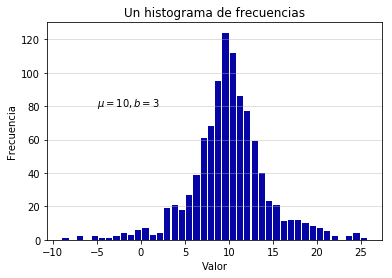

In [10]:
n, bins, patches = plt.hist(x=x, bins = 'auto', color = '#0505a5', rwidth=0.85 ) #color esta en hexadecimal, alpha es la transparencia
plt.grid(axis='y', alpha = 0.5) #agrega lineas horizontales
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Un histograma de frecuencias')
plt.text(-5, 80, r'$\mu = 10, b= 3$')

In [51]:
n

array([  2.,   2.,   1.,   2.,   2.,   4.,   1.,   3.,   3.,  10.,   6.,
        11.,  20.,  28.,  44.,  58.,  74.,  71., 101., 150., 102.,  72.,
        50.,  51.,  38.,  25.,  13.,  24.,   6.,   5.,   6.,   2.,   3.,
         3.,   2.,   1.,   0.,   2.,   0.,   1.,   0.,   0.,   0.,   0.,
         0.,   1.])

In [52]:
bins

array([-7.648, -6.733, -5.817, -4.901, -3.985, -3.069, -2.153, -1.237,
       -0.321,  0.595,  1.511,  2.427,  3.343,  4.259,  5.175,  6.091,
        7.007,  7.923,  8.839,  9.755, 10.671, 11.587, 12.503, 13.419,
       14.335, 15.25 , 16.166, 17.082, 17.998, 18.914, 19.83 , 20.746,
       21.662, 22.578, 23.494, 24.41 , 25.326, 26.242, 27.158, 28.074,
       28.99 , 29.906, 30.822, 31.738, 32.654, 33.57 , 34.486])

In [53]:
patches

<a list of 46 Patch objects>

In [19]:
import pandas as pd

In [20]:
size, scale = 1000, 10
data = pd.Series(np.random.gamma(scale, size=size))

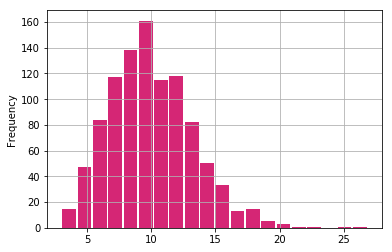

In [13]:
data.plot.hist(grid = True, bins = 20, rwidth = 0.9, color = "#d52675")

## Funciones de densidad y de probabilidad

In [16]:
mu = 10, 20
sigma = 5, 2
dist = pd.DataFrame(np.random.normal(loc = mu, scale= sigma, size = (1000, 2)), columns=['x1','x2'])

In [18]:
dist.agg(['min', 'max', 'mean', 'std']).round(decimals = 2)

,x1,x2
min,-7.61,14.69
max,26.49,26.13
mean,9.91,19.99
std,4.94,1.96


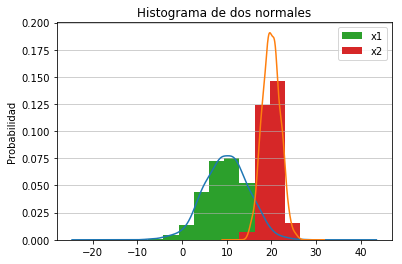

In [19]:
fig, ax = plt.subplots()
dist.plot.kde(ax=ax, legend = False, title = "Histograma de dos normales")#Crea la curva de distribución
dist.plot.hist(density = True, ax=ax)
ax.set_ylabel("Probabilidad")
ax.grid(axis="y", alpha=0.75)
ax.set_facecolor=("#d5d5d5")

In [1]:
from scipy import stats

In [2]:
dist = stats.norm()# crea la distribución normal teórica N(0,1)

In [4]:
sample = dist.rvs(size=1000)#crea la muestra

In [8]:
x = np.linspace(start = stats.norm.ppf(0.01), stop = stats.norm.ppf(0.99), num = 250)

In [9]:
gkde = stats.gaussian_kde(dataset= sample)

Text(-2.0, 0.35, '$f(x)= \\frac{e^{-x^2/2}}{\\sqrt{2\\pi}}$')

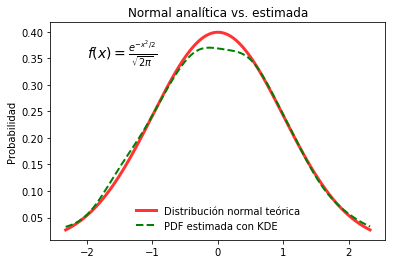

In [13]:
fig, ax = plt.subplots()
ax.plot(x,dist.pdf(x), linestyle = "solid", c= "red", lw = 3, alpha=0.8, label = "Distribución normal teórica")
ax.plot(x, gkde.evaluate(x), linestyle = "dashed", c = "green", lw = 2, label = "PDF estimada con KDE")
ax.legend(loc="Best", frameon = False)
ax.set_title("Normal analítica vs. estimada")
ax.set_ylabel("Probabilidad")
ax.text(-2.,0.35, r'$f(x)= \frac{e^{-x^2/2}}{\sqrt{2\pi}}$', fontsize = 14)

## Histogramas con Seaborn

In [16]:
import seaborn as sns

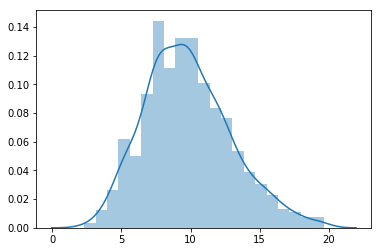

In [22]:
sns.distplot(data)

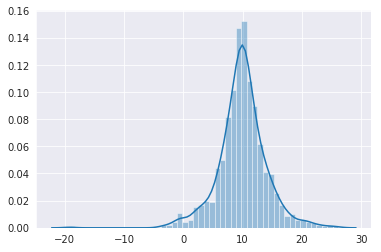

In [25]:
np.random.seed(2019)
x = np.random.laplace(loc=10, scale=3, size=1000)
sns.set_style("darkgrid") #Investigar distintos estilps de seaborn
sns.distplot(x)

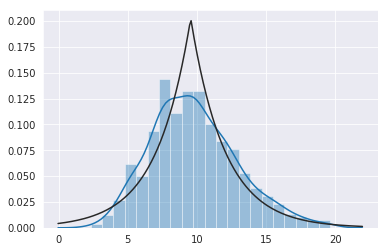

In [28]:
sns.distplot(data, fit=stats.laplace)#Fit pinta la distribucióin teórica para contrastar como se ajustan los datos a la misma (negra) y la estimada a partir de los datos (azul) 
                                     # la estimada se puede eliminar con kde=False   

## Otras formas

In [32]:
data2 = np.random.choice(np.arange(10), size=10000, p = np.linspace(1,11,10)/60)

In [33]:
s= pd.Series(data2)
s.value_counts()

9    1840
8    1622
7    1478
6    1276
5    1050
4     909
3     781
2     537
1     361
0     146
dtype: int64

In [34]:
s.value_counts(normalize=True) 

9    0.1840
8    0.1622
7    0.1478
6    0.1276
5    0.1050
4    0.0909
3    0.0781
2    0.0537
1    0.0361
0    0.0146
dtype: float64

In [36]:
ages = pd.Series([1,1,3,5,6,8,9,10,12,15,18,18,18,20,25,30,40,51,52])
bins = (0,10,15,18,21,np.inf)
labels = ('infancia','preadolescencia', 'adolescencia', 'universitario','adulto')
groups = pd.cut(ages, bins = bins, labels = labels)

In [38]:
groups.value_counts()

infancia           8
adulto             5
adolescencia       3
preadolescencia    2
universitario      1
dtype: int64

In [42]:
edad= pd.concat((ages, groups),axis=1).rename(columns={0:'age', 1:'group'})